In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [5]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
batch_size = 32
epochs = 3
IMG_HEIGHT = 100
IMG_WIDTH = 100

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [27]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [28]:
sample_training_images, sample_training_labels = next(train_data_gen)

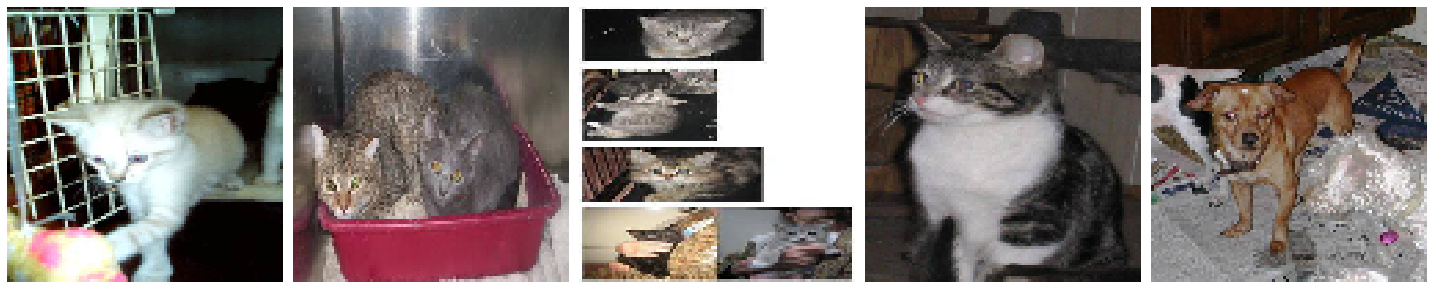

In [29]:
plotImages(sample_training_images[:5])

In [25]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [28]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/3
62/62 [==============================] - 31s 493ms/step - loss: 0.7197 - accuracy: 0.5107 - val_loss: 0.6923 - val_accuracy: 0.4990
Epoch 2/3
62/62 [==============================] - 30s 476ms/step - loss: 0.6776 - accuracy: 0.5142 - val_loss: 0.6313 - val_accuracy: 0.6522
Epoch 3/3
62/62 [==============================] - 30s 477ms/step - loss: 0.6138 - accuracy: 0.6565 - val_loss: 0.6822 - val_accuracy: 0.6421


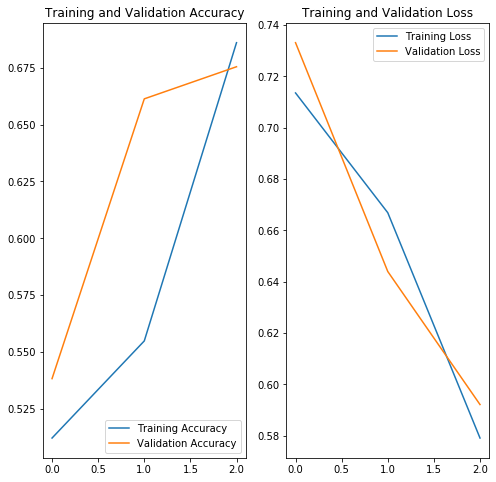

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
model.save("./")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./assets


In [8]:
restored_keras_model = tf.keras.models.load_model("./")



In [15]:
history = restored_keras_model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/3
62/62 [==============================] - 30s 481ms/step - loss: 0.6875 - accuracy: 0.6901 - val_loss: 0.3618 - val_accuracy: 0.8095
Epoch 2/3
62/62 [==============================] - 29s 461ms/step - loss: 0.3284 - accuracy: 0.8549 - val_loss: 0.3115 - val_accuracy: 0.8599
Epoch 3/3
62/62 [==============================] - 29s 470ms/step - loss: 0.1063 - accuracy: 0.9669 - val_loss: 0.3624 - val_accuracy: 0.8528


In [17]:
model2_path = "./model2"
tf.saved_model.save(restored_keras_model, model2_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./model2/assets


In [16]:
test_loss, test_acc = restored_keras_model.evaluate_generator(val_data_gen)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.979


In [10]:
import pathlib

f_dir = pathlib.Path("/tf/notebooks/tensorflow/tf2_tfrecord_loadimg/train")
f_count = len(list(f_dir.glob('*/*.jpg')))
f_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
FCLASS_NAMES = np.array([item.name for item in f_dir.glob('*') ])
f_data_gen = f_generator.flow_from_directory(directory=str(f_dir),
                                                     batch_size=10,
                                                     shuffle=True,
                                                     target_size=(100, 100),
                                                     classes = list(FCLASS_NAMES))
f_image_batch, f_label_batch = next(f_data_gen)

Found 20 images belonging to 2 classes.


In [11]:
f_predictions = restored_keras_model.predict(f_image_batch)

In [12]:
for item in f_predictions:
    if item < 0:
        print("cat")
    else:
        print("dog")

cat
dog
dog
cat
dog
dog
cat
dog
dog
cat


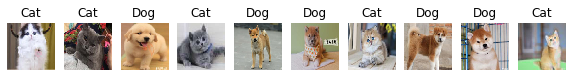

In [13]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(10):
      ax = plt.subplot(1,10,n+1)
      plt.imshow(image_batch[n])
      plt.title(FCLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
show_batch(f_image_batch, f_label_batch)